In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical

In [2]:
import tensorflow.keras.backend as K

In [3]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random

In [4]:
import time

In [5]:
dirtrain='/content/drive/My Drive/Grapes Leaves Dataset (images)-20200121T090959Z-001/Grapes Leaves Dataset (images)/train'
dirtest='/content/drive/My Drive/Grapes Leaves Dataset (images)-20200121T090959Z-001/Grapes Leaves Dataset (images)/test'
categories=["Black_rot","Esca_(Black_Measles)","Healthy","Leaf_blight_(Isariopsis_Leaf_Spot)"]

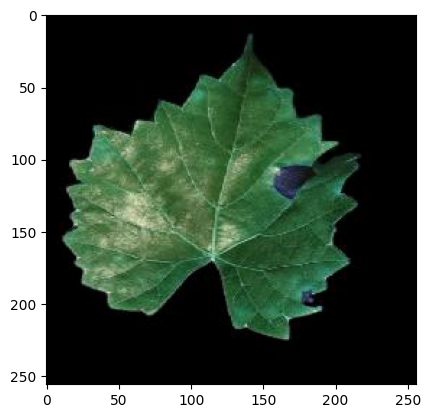

In [6]:
plt.style.use("default")
for c in categories:
    path=os.path.join(dirtrain,c)
    for i in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,i))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [7]:
training_data = []
def create_training_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count

count_train=create_training_data()

In [8]:
testing_data = []
def create_testing_data():
    count=[]
    for c in categories:      
      path=os.path.join(dirtest,c)
      class_num=categories.index(c)
      c=0      
      for i in os.listdir(path):
          c=c+1          
          try:
              img_array=cv2.imread(os.path.join(path,i))
              testing_data.append([img_array,class_num])
          except Exception as e:
              pass
      count.append(c) 
    return count

count_test=create_testing_data()

In [9]:
print(len(training_data))
print(count_train)
print(len(testing_data))
print(count_test)

3209
[966, 1154, 213, 876]
880
[210, 240, 220, 210]


In [10]:
x_train = []
y_train = []
x_test = []
y_test = []

In [11]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
x_train=np.array(x_train).reshape(-1,256,256,3)

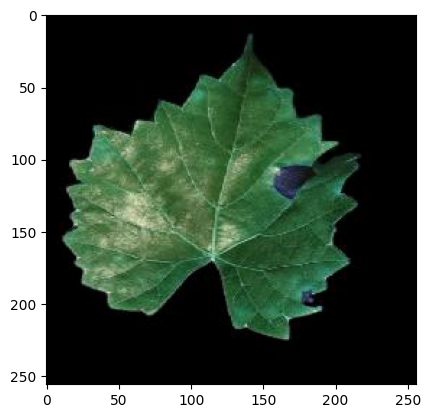

In [12]:
x=cv2.resize(training_data[0][0],(256,256))
plt.imshow(x,cmap='gray')

In [13]:
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,256,256,3)

In [14]:
def save_training_data(x_train,y_train):
    pickle_out=open("x_train.pickle","wb")
    pickle.dump(x_train,pickle_out)
    pickle_out.close()

    pickle_out=open("y_train.pickle","wb")
    pickle.dump(y_train,pickle_out)
    pickle_out.close
save_training_data(x_train,y_train)

In [15]:
def save_testing_data(x_test,y_test):
    pickle_out=open("x_test.pickle","wb")
    pickle.dump(x_test,pickle_out)
    pickle_out.close()

    pickle_out=open("y_test.pickle","wb")
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
save_testing_data(x_test,y_test)

In [16]:
def load_data():
    pickle_in=open("x_train_data.pickle","rb")
    x_train=pickle.load(pickle_in)
    return x_train

In [17]:
K.clear_session()
model=Sequential() 
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(8,8)))
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(8,8)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
activation (Activation)      (None, 3, 3, 32)          0

In [19]:
y_train_cat=to_categorical(y_train,4)

In [20]:
y_test_cat=to_categorical(y_test,4)

In [21]:
start=time.time()
modelplot=model.fit(x_train,y_train_cat,batch_size=32,
          epochs=10,verbose=2,validation_split=0.15,shuffle=True)
stop=time.time()
timetaken=stop-start
tm=time.strftime("%H:%M:%S", time.gmtime(timetaken))

Epoch 1/10
86/86 - 13s - loss: 1.9228 - accuracy: 0.5618 - val_loss: 0.1100 - val_accuracy: 0.9710
Epoch 2/10
86/86 - 12s - loss: 0.3809 - accuracy: 0.8493 - val_loss: 0.7376 - val_accuracy: 0.7635
Epoch 3/10
86/86 - 12s - loss: 0.2317 - accuracy: 0.9153 - val_loss: 0.0847 - val_accuracy: 0.9710
Epoch 4/10
86/86 - 12s - loss: 0.1434 - accuracy: 0.9461 - val_loss: 0.5633 - val_accuracy: 0.8237
Epoch 5/10
86/86 - 12s - loss: 0.0922 - accuracy: 0.9652 - val_loss: 0.1511 - val_accuracy: 0.9481
Epoch 6/10
86/86 - 12s - loss: 0.0622 - accuracy: 0.9784 - val_loss: 0.1513 - val_accuracy: 0.9523
Epoch 7/10
86/86 - 12s - loss: 0.1030 - accuracy: 0.9586 - val_loss: 0.0519 - val_accuracy: 0.9793
Epoch 8/10
86/86 - 12s - loss: 0.0349 - accuracy: 0.9883 - val_loss: 0.0983 - val_accuracy: 0.9668
Epoch 9/10
86/86 - 12s - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0334 - val_accuracy: 0.9917
Epoch 10/10
86/86 - 12s - loss: 0.0356 - accuracy: 0.9850 - val_loss: 0.0955 - val_accuracy: 0.9689


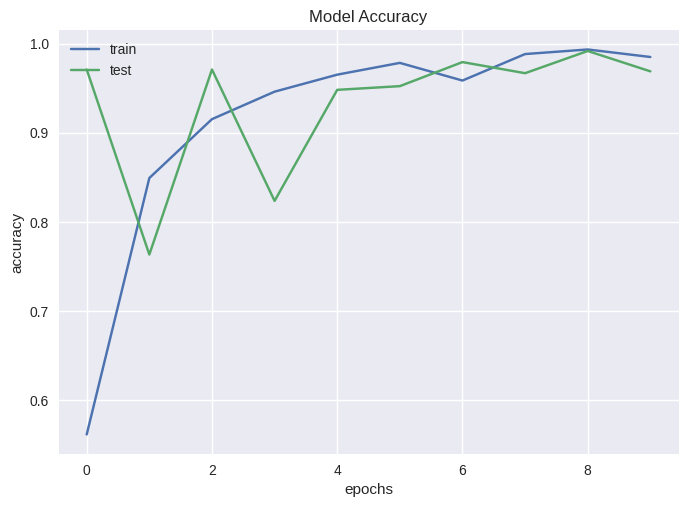

In [22]:
plt.style.use("seaborn")
plt.plot(modelplot.history['accuracy'])
plt.plot(modelplot.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['train','test'],loc='upper left')

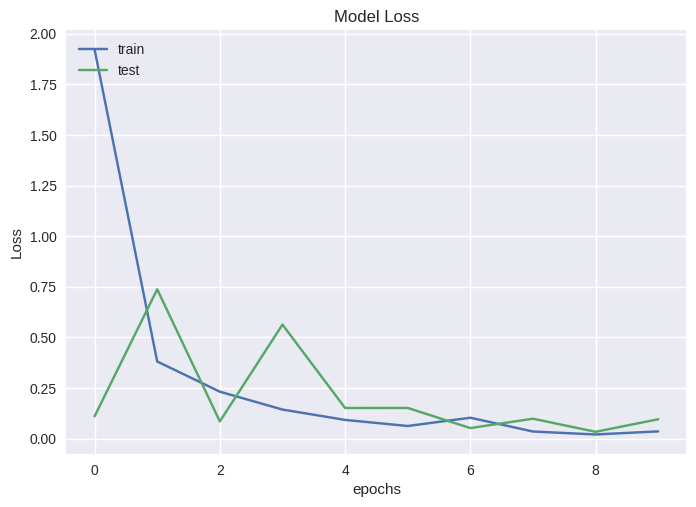

In [23]:
plt.style.use("seaborn")
plt.plot(modelplot.history['loss'])
plt.plot(modelplot.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train','test'],loc='upper left')

In [24]:
model.save("myproject.h5")

In [25]:
new_model=tf.keras.models.load_model("myproject.h5")

In [26]:
loss, acc = new_model.evaluate(x_test,y_test_cat, verbose=2, batch_size=400)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

3/3 - 2s - loss: 0.1308 - accuracy: 0.9625
Restored model, accuracy: 96.25%


In [28]:
print(tm)

00:02:10


[0]
Black_rot
******************************************************************************************
Remedies:
You can buy PSEUDOMONAS FLORESCENS whose trade name is Green Combat, from Green Life Biolabs
for more information visit http://greenlifebiolabs.com/bio-pesticides/
******************************************************************************************


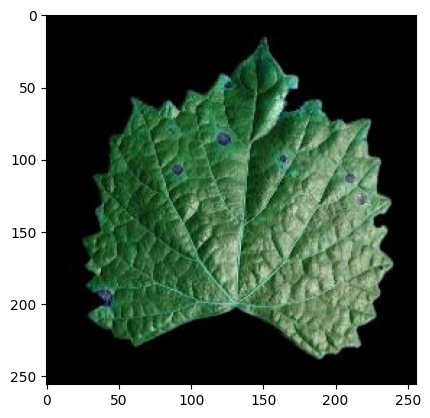

In [27]:
plt.style.use("default")
d='/content/drive/My Drive/Grapes Leaves Dataset (images)-20200121T090959Z-001/Grapes Leaves Dataset (images)/test/Black_rot/02a1df6c-97ec-41d4-b00c-9510741a39dc___FAM_B.Rot 0552_final_masked.jpg'
img=cv2.imread(d)
dim=(256,256)
img=cv2.resize(img,dim)
plt.imshow(img)
img=img.reshape(-1,256,256,3)
predict_class=np.argmax(new_model.predict(img), axis=1)
print(predict_class)
print(categories[predict_class[0]])
print("******************************************************************************************")
print("Remedies:")
if(predict_class==[0]):
  print("You can buy PSEUDOMONAS FLORESCENS whose trade name is Green Combat, from Green Life Biolabs")
elif(predict_class==[1]):
  print("You can buy TRICHODERM HARZIANUM whose trade name is Green Harz, from Green Life Biolabs")
elif(predict_class==[2]):
  print("Your Leaf is healthy")
elif(predict_class==[3]):
  print("You can buy BACILLUS LICHENIFORMIS whose trade name is Green Leaf Care, from Green Life Biolabs")
print("for more information visit http://greenlifebiolabs.com/bio-pesticides/")
print("******************************************************************************************")